In [83]:
#read data
lable = open("S71.dat")
next(lable)
taglist=[]
labellist=[]
for line in lable:
    tag = line.split()[0]
    taglist.append(tag)
    lable = float(line.split()[1])
    if lable > 0.1:
        lable = 1
        labellist.append(lable)
    if lable < 0.1:
        lable = 0
        labellist.append(lable)
    
    
print(taglist,labellist)

['A152S', 'A183T', 'A215P', 'A226P', 'A240V', 'A248P', 'A40P', 'A47W', 'A82V', 'D112R', 'D186H', 'D186W', 'D220E', 'E204K', 'E231M', 'E231R', 'G139N', 'G147T', 'G165A', 'G254V', 'G66A', 'H104F', 'I168R', 'I208V', 'K148W', 'K259F', 'K95A', 'L117F', 'M154F', 'N212R', 'N225V', 'N241L', 'N246W', 'N37P', 'P181A', 'P210K', 'P217L', 'Q119Y', 'Q133Y', 'Q182L', 'Q228V', 'Q91P', 'R100F', 'R123V', 'R280A', 'R90D', 'S125R', 'S136Q', 'S141P', 'S166T', 'S175W', 'S187P', 'S187W', 'S188Q', 'S193R', 'S238F', 'S54W', 'S92P', 'T113P', 'T116P', 'T140D', 'T151P', 'T198V', 'T266P', 'T279P', 'T286V', 'T51P', 'T77E', 'T77P', 'V134L', 'W159H'] [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]


In [84]:
import numpy as np
y = np.array(labellist)

In [85]:
import pandas as pd

df=pd.read_csv('fullS71.dat', sep=',')

In [86]:
df

,,mutation,Q,W,E,R,T,Y,I,P,A,...,SAS,dssp1,dssp2,dssp3,dssp4,dssp5,dssp6,dssp7,dssp8,rd
A152S,0,0,0,0,0,0,0,0,-1,0,1,...,0.698113,1,-0.2,2,-0.5,-3,-0.1,-1,-0.3,2.096435
A183T,0,0,0,0,1,0,0,0,-1,0,0,...,0.018868,18,-2.7,-20,-0.2,-2,-0.4,-1,-0.2,8.212289
A215P,0,0,0,0,0,0,0,1,-1,0,0,...,0.028302,-6,-0.4,4,-2.4,-31,-0.3,5,-0.1,5.782843
A226P,0,0,0,0,0,0,0,1,-1,0,0,...,0.132075,-2,-0.3,-28,-2.2,-31,-0.3,2,-0.3,3.921521
A240V,0,0,0,0,0,0,0,0,-1,0,0,...,0.009434,-3,-0.3,-1,-0.3,-4,-0.1,3,-0.1,7.138943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T51P,0,0,0,0,-1,0,0,0,1,0,0,...,0.415493,-2,-0.3,21,-2.6,-4,-0.1,22,-0.5,2.474166
T77E,0,0,1,0,-1,0,0,0,0,0,0,...,0.373239,-2,-0.3,2,-0.3,72,-0.1,72,-0.3,2.606457
T77P,0,0,0,0,-1,0,0,0,1,0,0,...,0.373239,-2,-0.3,2,-0.3,72,-0.1,72,-0.3,2.606457
V134L,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,-4,-2.3,4,-2.2,2,-0.2,-2,-0.2,5.213174


In [87]:
x = df.values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
Y = y

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

In [88]:
Y_train.shape

(35,)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [112]:
train_score = []
test_score = []
best_clf = None
best_test = 0
for c in np.arange(1,2000):
    clf = LogisticRegression(random_state=0,C = c/1000,max_iter=10000)
    clf.fit(X_train,Y_train)
    test_score.append(clf.score(X_test,Y_test))
    train_score.append(clf.score(X_train,Y_train))
    if test_score[-1] > best_test:
        best_test = test_score[-1]
        best_clf = clf

In [113]:
import matplotlib.pyplot as plt

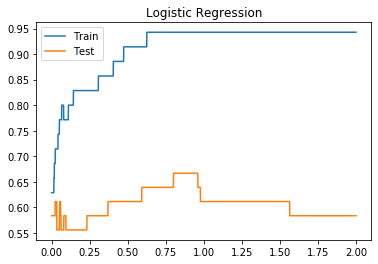

In [114]:
plt.plot(np.arange(1,2000)/1000,train_score,label='Train')
plt.plot(np.arange(1,2000)/1000,test_score,label='Test')
plt.title("Logistic Regression")
plt.legend()
plt.show()

In [116]:
print("Best Model| Train Score: {:}| Test Score: {:}".format(best_clf.score(X_train,Y_train),best_clf.score(X_test,Y_test)))

Best Model| Train Score: 0.9428571428571428| Test Score: 0.6666666666666666


In [115]:
import plotly.express as px
import numpy as np

# create the bins

fig = px.bar(x=df.columns, y=best_clf.coef_[0], labels={'x':'features', 'y':'weight'},title='Feature map')
fig.show()

# SVM

In [94]:
from sklearn.svm import SVC

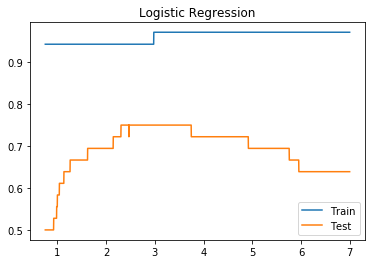

Best Model| Train Score: 0.9428571428571428| Test Score: 0.75


In [117]:
train_score = []
test_score = []
best_clf = None
best_test = 0
for c in np.arange(750,7000):
    clf = SVC(random_state=0,C = c/1000,max_iter=10000,kernel='linear')
    clf.fit(X_train,Y_train)
    test_score.append(clf.score(X_test,Y_test))
    train_score.append(clf.score(X_train,Y_train))
    if test_score[-1] > best_test:
        best_test = test_score[-1]
        best_clf = clf
plt.plot(np.arange(750,7000)/1000,train_score,label='Train')
plt.plot(np.arange(750,7000)/1000,test_score,label='Test')
plt.title("Logistic Regression")
plt.legend()
plt.show()
print("Best Model| Train Score: {:}| Test Score: {:}".format(best_clf.score(X_train,Y_train),best_clf.score(X_test,Y_test)))

In [118]:
fig = px.bar(x=df.columns, y=best_clf.coef_[0], labels={'x':'features', 'y':'weight'},title='SVM Feature map')
fig.show()

# Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

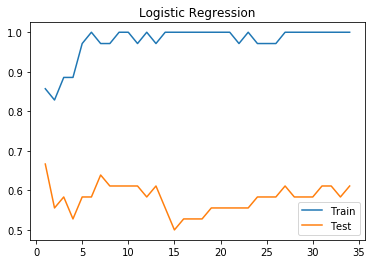

Best Model| Train Score: 0.8571428571428571| Test Score: 0.6666666666666666


In [120]:
train_score = []
test_score = []
best_clf = None
best_test = 0
for c in np.arange(1,len(X_train)):
    clf = RandomForestClassifier(random_state=0,n_estimators=c)
    clf.fit(X_train,Y_train)
    test_score.append(clf.score(X_test,Y_test))
    train_score.append(clf.score(X_train,Y_train))
    if test_score[-1] > best_test:
        best_test = test_score[-1]
        best_clf = clf
plt.plot(np.arange(1,len(X_train)),train_score,label='Train')
plt.plot(np.arange(1,len(X_train)),test_score,label='Test')
plt.title("Logistic Regression")
plt.legend()
plt.show()
print("Best Model| Train Score: {:}| Test Score: {:}".format(best_clf.score(X_train,Y_train),best_clf.score(X_test,Y_test)))